# Download intent

In [2]:
nama_file = "intents_terpaling_baru.json"

In [3]:
!wget "https://raw.githubusercontent.com/AndiAlifs/Halofilkom_dump/master/"$nama_file"

/bin/sh: 1: Syntax error: Unterminated quoted string


# Import Library

In [4]:
from email import message
import json
import random
import string
from unittest import result

import nltk
import numpy as np
import pandas as pd
from nltk.stem import WordNetLemmatizer

import tensorflow as tf
import joblib
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, precision_recall_fscore_support
import pickle

import re
import math
from collections import Counter

In [5]:
nltk.download("punkt")
nltk.download("wordnet")
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     /home/alfirsafauzulh@student.ub.ac.id/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/alfirsafauzulh@student.ub.ac.id/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/alfirsafauzulh@student.ub.ac.id/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [6]:
f = open(nama_file, encoding="utf8")
data = json.load(f)
f.close()

# Mendapatkan Penggalan Kata
lemmatizer = WordNetLemmatizer()

In [7]:
# Menampung Penggalan Kata
words = []
classes = []
doc_X = []
doc_Y = []

for intent in data["intents"]:
    for pattern in intent["patterns"]:
        token = nltk.word_tokenize(pattern)
        words.extend(token)
        doc_X.append(pattern)
        doc_Y.append(intent["tag"])

# Menambahkan tag jika belum tersedia
    if intent["tag"] not in "classes":
        classes.append(intent["tag"])

# stemmer = StemmerFactory().create_stemmer()

words = [word.lower() for word in words if word not in string.punctuation and len(word) > 2]
words = sorted(set(words))
classes = sorted(set(classes))

# List training Data
training = []
out_empty = [0] * len(classes)

In [8]:
d = {'patterns': doc_X, 'classes': doc_Y}
df = pd.DataFrame(data=d)

In [10]:
df.to_csv('data_latih_bisakeknya.csv', index=False)

<AxesSubplot:>

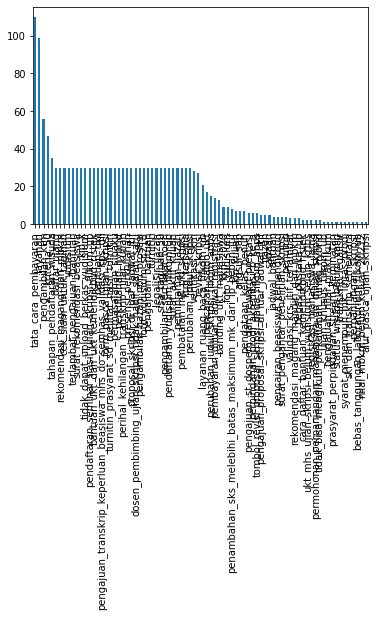

In [27]:
df['classes'].value_counts().plot(kind='bar')

In [11]:
training = []

# Membuat Model Training Chatbot
for idx, doc in enumerate(doc_X):
    bow = []
    text = doc.lower()
    # text = stemmer.stem(text)
    for word in words:
        bow.append(1) if word in text else bow.append(0)

    # membuat urutan index untuk class
    output_row = list(out_empty)
    output_row[classes.index(doc_Y[idx])] += 1

    # add the one hot encoded BoW and associated classes to training
    training.append([bow, output_row])

# add no response training
bow = [0 for i in range(len(words))]
output_row = list(out_empty)
output_row[classes.index('no_response')] += 1
training.append([bow, output_row])

# shuffle the data and convert it to an array
random.shuffle(training)
training = np.array(training, dtype=object)

# split the features and target labels
train_X = np.array(list(training[:, 0]))
train_y = np.array(list(training[:, 1]))

# defining some parameters
input_shape = (len(train_X[0]),)
output_shape = len(train_y[0])

# Training model ML

In [17]:
# make a label encoding training data
train_y_label = np.argmax(train_y, axis=1)

## Random Forest

In [13]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

### using one hot encoding

In [14]:
# machine learning model
from sklearn.ensemble import RandomForestClassifier

model_ml = RandomForestClassifier()
model_ml.fit(train_X, train_y)
y_preds = model_ml.predict(train_X)
report_onehot_rf = classification_report(train_y, y_preds)
print(report_onehot_rf)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00        13
           4       0.00      0.00      0.00         0
           5       0.95      0.60      0.73        30
           6       0.94      0.57      0.71        30
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       1.00      0.67      0.80         3
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         2
          13       1.00      0.97      0.98        30
          14       0.00      0.00      0.00         0
          15       1.00      0.97      0.98        30
          16       0.96      0.73      0.83        30
          17       0.00    

In [15]:
report_onehot_rf = classification_report(train_y, y_preds, output_dict=True)
df_report_onehot_rf = pd.DataFrame(report_onehot_rf).transpose()
df_report_onehot_rf.to_csv('report_onehot_rf.csv')

### Use label encoding

In [18]:
# machine learning model
from sklearn.ensemble import RandomForestClassifier

model_ml = RandomForestClassifier()
model_ml.fit(train_X, train_y_label)
y_preds = model_ml.predict(train_X)
print(classification_report(train_y_label, y_preds))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00        13
           5       0.74      0.77      0.75        30
           6       0.69      0.83      0.76        30
          10       0.50      1.00      0.67         3
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         2
          13       1.00      0.97      0.98        30
          15       0.97      1.00      0.98        30
          16       0.81      0.87      0.84        30
          19       0.87      0.67      0.75        30
          20       0.90      1.00      0.95         9
          21       0.94      1.00      0.97        30
          22       1.00      1.00      1.00         5
          23       1.00      1.00      1.00         4
          24       0.78      0.83      0.81        30
          25       0.50    

In [51]:
report_label_rf = classification_report(train_y_labels, y_preds, output_dict=True)
df_report_label_rf = pd.DataFrame(report_label_rf).transpose()
df_report_label_rf.to_csv('report_label_rf.csv')

## Naive Bayes

### Menggunakan label encoding

In [52]:
# import library naive bayes
from sklearn.naive_bayes import MultinomialNB

# membuat model naive bayes
model_nb = MultinomialNB()
model_nb.fit(train_X, train_y_labels)
y_preds = model_nb.predict(train_X)
print(classification_report(train_y_labels, y_preds))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         7
           3       0.90      0.69      0.78        13
           5       0.50      0.23      0.32        30
           6       0.72      0.43      0.54        30
          10       1.00      0.33      0.50         3
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         2
          13       0.92      0.37      0.52        30
          15       0.78      0.93      0.85        30
          16       0.74      0.47      0.57        30
          19       0.65      0.43      0.52        30
          20       1.00      0.22      0.36         9
          21       0.75      0.10      0.18        30
          22       0.00      0.00      0.00         5
          23       1.00      0.75      0.86         4
          24       1.00      0.17      0.29        30
          25       0.00    

In [53]:
report_label_nb = classification_report(train_y_labels, y_preds, output_dict=True)
df_report_label_nb = pd.DataFrame(report_label_nb).transpose()
df_report_label_nb.to_csv('report_label_nb.csv')

## KNN

### Menggunakan one hot encoding

In [54]:
# import knn library
from sklearn.neighbors import KNeighborsClassifier

# membuat model knn
model_knn = KNeighborsClassifier()
model_knn.fit(train_X, train_y)
y_preds = model_knn.predict(train_X)
print(classification_report(train_y, y_preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         1
           2       0.50      0.14      0.22         7
           3       0.88      0.54      0.67        13
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00        30
           6       0.50      0.07      0.12        30
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         2
          13       1.00      0.20      0.33        30
          14       0.00      0.00      0.00         0
          15       1.00      0.37      0.54        30
          16       0.80      0.13      0.23        30
          17       0.00    

In [55]:
report_onehot_knn = classification_report(train_y, y_preds, output_dict=True)
df_report_onehot_knn = pd.DataFrame(report_onehot_knn).transpose()
df_report_onehot_knn.to_csv('report_onehot_knn.csv')

### Menggunakan label encoding

In [56]:
# membuat model knn
model_knn = KNeighborsClassifier()
model_knn.fit(train_X, train_y_labels)
y_preds = model_knn.predict(train_X)
print(classification_report(train_y_labels, y_preds))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.86      0.86      0.86         7
           3       0.80      0.92      0.86        13
           5       0.42      0.73      0.54        30
           6       0.36      0.60      0.45        30
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         1
          12       1.00      1.00      1.00         2
          13       0.41      0.53      0.46        30
          15       0.70      0.70      0.70        30
          16       0.39      0.53      0.45        30
          19       0.65      0.37      0.47        30
          20       0.60      1.00      0.75         9
          21       0.25      0.63      0.36        30
          22       1.00      0.40      0.57         5
          23       1.00      0.75      0.86         4
          24       0.21      0.73      0.32        30
          25       0.00    

In [57]:
report_label_knn = classification_report(train_y_labels, y_preds, output_dict=True)
df_report_label_knn = pd.DataFrame(report_label_knn).transpose()
df_report_label_knn.to_csv('report_label_knn.csv')

## Support Vector Machine

### Menggunakan label encoding

In [58]:
# import svm 
from sklearn.svm import SVC

# membuat model svm
model_svm = SVC()

model_svm.fit(train_X, np.argmax(train_y, axis=1))
y_preds = model_svm.predict(train_X)
print(classification_report(np.argmax(train_y, axis=1), y_preds))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       1.00      0.71      0.83         7
           3       0.92      0.92      0.92        13
           5       0.80      0.40      0.53        30
           6       0.56      0.80      0.66        30
          10       1.00      0.33      0.50         3
          11       0.00      0.00      0.00         1
          12       1.00      1.00      1.00         2
          13       0.92      0.73      0.81        30
          15       0.91      1.00      0.95        30
          16       0.76      0.83      0.79        30
          19       0.69      0.73      0.71        30
          20       0.82      1.00      0.90         9
          21       0.77      0.67      0.71        30
          22       1.00      0.60      0.75         5
          23       1.00      1.00      1.00         4
          24       0.28      0.60      0.38        30
          25       0.00    

In [59]:
report_onehot_svm = classification_report(np.argmax(train_y, axis=1), y_preds, output_dict=True)
df_report_onehot_svm = pd.DataFrame(report_onehot_svm).transpose()
df_report_onehot_svm.to_csv('report_onehot_svm.csv')

# Training model DL

In [11]:
# cb = tf.keras.callbacks.EarlyStopping(
#     monitor='accuracy',
#     patience=3,
#     verbose=1,
#     mode='auto',
#     restore_best_weights=True
# )

In [12]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
# fix random seed for reproducibility
# tf.random.set_seed(7)

In [14]:
from sklearn.model_selection import train_test_split

X = list(training[:, 0])
Y = list(training[:, 1])

x_train,x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)
x_train = X
y_train = Y 

In [18]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

# make kfold
kfold = KFold(n_splits=10, shuffle=True, random_state=7)
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)

In [20]:
#deep learning model
model = Sequential()
model.add(Dense(128, input_shape=input_shape, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(output_shape, activation="softmax"))
adam = tf.keras.optimizers.Adam(learning_rate=0.01, decay=1e-6)
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=["accuracy"])
print(model.summary())

history_dl = model.fit(x=train_X, 
                       y=train_y,
                       epochs=150,
                       verbose=1,
                       workers = 2,
                       validation_data=(x_test, y_test)
                          )

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               75520     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 124)               15996     
Total params: 108,028
Trainable params: 108,028
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/150
50/50 [==============================] - 2s 37ms/step - loss: 3.4750 - accuracy: 0.2226 - val_loss: 2.1818 - val_accuracy: 0.4313
Epoch 2/150
50/50 [==============================] - 0s 6ms/step - loss: 1.9974 - accuracy: 0.4759 

# Model Evaluation Performance & Experiments

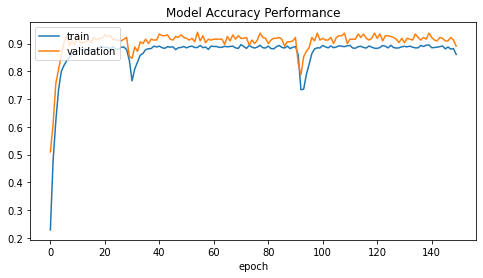

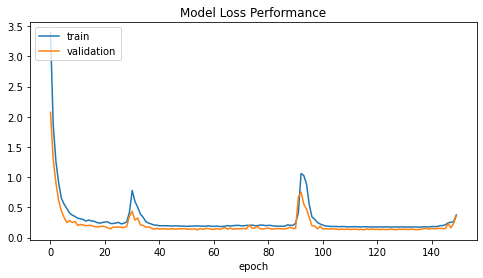

In [68]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.plot(history_dl.history['accuracy'])
plt.plot(history_dl.history['val_accuracy'])
plt.title('Model Accuracy Performance')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left') 
plt.show()


plt.figure(figsize=(8,4))
plt.plot(history_dl.history['loss'])
plt.plot(history_dl.history['val_loss'])
plt.title('Model Loss Performance')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left') 
plt.show()

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

# Clear any logs from previous runs
!rm -rf ./logs/

from tensorboard.plugins.hparams import api as hp

HP_NUM_UNITS1 = hp.HParam('num_units1', hp.Discrete([32, 64, 128, 256]))
HP_NUM_UNITS2 = hp.HParam('num_units2', hp.Discrete([32, 64, 128, 256]))
HP_DROPOUT = hp.HParam('dropout', hp.RealInterval(0.1, 0.5))
HP_OPTIMIZER = hp.HParam('optimizer', hp.Discrete(['adam', 'sgd']))

METRIC_ACCURACY = 'accuracy'

with tf.summary.create_file_writer('logs/hparam_tuning').as_default():
  hp.hparams_config(
    hparams=[HP_NUM_UNITS1, HP_NUM_UNITS2, HP_DROPOUT, HP_OPTIMIZER],
    metrics=[hp.Metric(METRIC_ACCURACY, display_name='Accuracy')],
  )

from sklearn.model_selection import train_test_split

X = list(training[:, 0])
Y = list(training[:, 1])

x_train,x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)
x_train = X
y_train = Y 

session_num = 0

def train_test_model(hparams):
    model = Sequential()
    model.add(Dense(hparams[HP_NUM_UNITS1], input_shape=input_shape, activation="relu"))
    model.add(Dropout(hparams[HP_DROPOUT]))
    model.add(Dense(hparams[HP_NUM_UNITS2], activation="relu"))
    model.add(Dense(output_shape, activation="softmax"))
    model.compile(loss='categorical_crossentropy',
                optimizer=hparams[HP_OPTIMIZER],
                metrics=["accuracy"]) 

    model.fit(x_train, y_train, epochs=50) # Run with 1 epoch to speed things up for demo purposes_, 

    accuracy = model.evaluate(x_test, y_test)
    return accuracy[1]

def run(run_dir, hparams):
  with tf.summary.create_file_writer(run_dir).as_default():
    hp.hparams(hparams)  # record the values used in this trial
    accuracy = train_test_model(hparams)
    tf.summary.scalar(METRIC_ACCURACY, accuracy, step=1)

for num_units1 in HP_NUM_UNITS1.domain.values:
  for num_units2 in HP_NUM_UNITS2.domain.values:
    for dropout_rate in (HP_DROPOUT.domain.min_value, HP_DROPOUT.domain.max_value):
      for optimizer in HP_OPTIMIZER.domain.values:
        hparams = {
            HP_NUM_UNITS1: num_units1,
            HP_NUM_UNITS2: num_units2,
            HP_DROPOUT: dropout_rate,
            HP_OPTIMIZER: optimizer,
        }
        run_name = "run-%d" % session_num
        print('--- Starting trial: %s' % run_name)
        print({h.name: hparams[h] for h in hparams})
        run('logs/hparam_tuning/' + run_name, hparams)
        session_num += 1

# Function

In [21]:
# Text cosine similiarity
def get_cosine(vec1, vec2):
    intersection = set(vec1.keys()) & set(vec2.keys())
    numerator = sum([vec1[x] * vec2[x] for x in intersection])

    sum1 = sum([vec1[x]**2 for x in vec1.keys()])
    sum2 = sum([vec2[x]**2 for x in vec2.keys()])
    denominator = math.sqrt(sum1) * math.sqrt(sum2)

    if not denominator:
        return 0.0
    else:
        return float(numerator) / (denominator)


def text_to_vector(text):
    word = re.compile(r'\w+')
    words = word.findall(text)
    return Counter(words)


def kesamaan(content_a, content_b):
    text1 = " ".join(content_a)
    text2 = " ".join(content_b)

    vector1 = text_to_vector(text1)
    vector2 = text_to_vector(text2)

    cosine_result = get_cosine(vector1, vector2)
    return cosine_result

In [22]:
import Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()
import re

# import nltk stopword indonesia from stopword_list.txt
stop_words = []
with open('stopword_list.txt') as f:
        stop_words = f.read().splitlines()

def removeStopwords(text):
        text = text.split(' ')
        text = [x for x in text if x not in stop_words]
        return ' '.join(text)

# import indonesian-words.txt to word list
word = []
with open('indonesian-words.txt') as f:
        word = f.read().splitlines()
        
def removeNonWords(text):
        text = text.split(' ')
        text = [x for x in text if x in word]
        return ' '.join(text)

def stemSentence(sentence):
        return stemmer.stem(sentence)

def cleanTag(text):
        text = text.replace('<p>','').replace('</p>','').replace('<ol>','').replace('</ol>','').replace('<li>','').replace('</li>','').replace('<ul>','').replace('</ul>','').replace('<br>','').replace('br','').replace('<strong>','').replace('</strong>','').replace('<em>','').replace('</em>','').replace('<a href="','').replace('">','').replace('</a>','').replace('<img src="','').replace('" alt="','').replace('" />','').replace('< />','').replace('\xa0','')
        return text

def cleanTagIntent(text):
        text = re.sub(r'[^\w\s]', '',text)
        text = text.lower().replace('keuangan','').replace('kemahasiswaan','').replace('akademik','').strip()
        text = text.replace('_',' ')
        return text


def cleanText(text):
        text = cleanTag(text)
        text = stemSentence(text)
        text = removeStopwords(text)
        text = removeNonWords(text)
        return text

In [48]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def clean_text(text):
    text = cleanText(text)
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens]
    return tokens


def bag_of_words(text, vocab):
    tokens = clean_text(text)
    bow = [0] * len(vocab)
    for w in tokens:
        for idx, word in enumerate(vocab):
            # if kesamaan(word,w) > 0.90:
            #     print(word,'<=>',w,kesamaan(word,w))
            #     bow[idx] = 1
            if word == w:
                # print(word)
                bow[idx] = 1
    return np.array(bow)


def pred_class(text, vocab, labels):
    bow = bag_of_words(text, vocab)
    result = model.predict(np.array([bow]))[0]
    # print(bow)
    # melakukan iterasi dari seluruh kemungkinan kelas
    thresh = 0.5
    y_pred = [[idx, res] for idx, res in enumerate(result) if res > thresh]

    y_pred.sort(key=lambda x: x[1], reverse=True)
    # print(y_pred)
    return_list = []

    for r in y_pred:
        return_list.append(labels[r[0]])
    if (len(return_list)) == 0:
        return ["no_response"]
    else:
        return return_list

def pred_class_ml(text, vocab, labels):
    bow = bag_of_words(text, vocab)
    result = model_ml.predict(np.array([bow]))[0]
    thresh = 0.5
    y_pred = [[idx, res] for idx, res in enumerate(result) if res > thresh]

    y_pred.sort(key=lambda x: x[1], reverse=True)
    return_list = []

    for r in y_pred:
        return_list.append(labels[r[0]])
    if (len(return_list)) == 0:
        return ["no_response"]
    else:
        return return_list


def get_response(intents_list, intents_json):
    tag = intents_list[0]
    list_of_intents = intents_json["intents"]
    for i in list_of_intents:
        if i["tag"] == tag:
            result = random.choice(i["responses"])
            break
    return result

# Test reponse

In [78]:
intext = input("Masukkan : ")
intext = stem_text(intext)
print(intext)
intent = pred_class(intext, words, classes)
print(intent)
get_response(intent,data)

saya ingin angsur ukt
angsur
ukt
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

'Terima Kasih telah menghubungi halo filkom, - setelah upload foto &amp; KTM pada folder drive, mahasiswa diharapkan tetap mengumpulkan pada filkom lt 1 dg memberikan konfirmasi kepada WA center Yudisium- progres yudisium view_mhs FILKOM bisa dilihat pada :https://docs.google.com/spreadsheets/d/1nWPCbAI-rnqGNcyLXf8BDk2p5wFHZicmNyjc4ELNCWM/edit?resourcekey&amp;pli=1#gid=1724341464" target="_blankhttps://docs.google.com/spreadsheets/d/1nWPCbAI-rnqGNcyLXf8BDk2p5wFHZicmNyjc4ELNCWM/edit?resourcekey&amp;pli=1#gid=1724341464 Pengajuan yudisium FILKOM : https://docs.google.com/forms/d/18TAxwwMnGuyOrPkDFUz_aopslsVIfKw7vaoCmiMtdQs/viewform?edit_requested=true" target="_blankhttps://docs.google.com/forms/d/18TAxwwMnGuyOrPkDFUz_aopslsVIfKw7vaoCmiMtdQs/viewform?edit_requested=true Terimakasih'

### Test with augmented data

In [79]:
df_latih_sample = pd.read_csv('data_latih_bisakeknya_augmented.csv').drop(columns=['patterns'])

In [81]:
df_latih_sample

,classes,text
0,pengajuan_proposal_skripsi_di_luar_jadwal_jtif,tombol hijau coba kait
1,registrasi_mahasiswa_lama,ukt siam status open status tolak
2,tahapan_pendaftaran_wisuda,period list limit prosedur
3,proposal_skripsi_di_luar_jadwal_jtif,Rabu redefinisi saran dispensasi menghubungkan...
4,ijazah,nilai target bawah berpikir target mengambil k...
...,...,...
695,presensi_perkuliahan,tes mata langsung
696,surat_aktif_kuliah,Bukti aktif ayah data penggajian lengkap.
697,revisi_skripsi,Kepala lembar departemen.
698,turnitin_prasyarat_sd_melihat_hasil_turnitin,dosen profesor dari artikel platform memeriksa...


In [83]:
df_latih_sample['text'] = df_latih_sample['text'].apply(str)
df_latih_sample['text'] = df_latih_sample['text'].apply(lambda x: cleanText(x))
df_latih_sample['text'] = df_latih_sample['text'].apply(lambda x: stemSentence(x))
df_latih_sample['text'] = df_latih_sample['text'].apply(lambda x: removeStopwords(x))
df_latih_sample['text'] = df_latih_sample['text'].apply(lambda x: removeNonWords(x))
df_latih_sample.head()

,classes,text
0,pengajuan_proposal_skripsi_di_luar_jadwal_jtif,tombol hijau coba kait
1,registrasi_mahasiswa_lama,ukt siam status open status tolak
2,tahapan_pendaftaran_wisuda,prosedur
3,proposal_skripsi_di_luar_jadwal_jtif,rabu redefinisi saran dispensasi hubung saran
4,ijazah,nilai target pikir target ambil nilai


In [84]:
actual_kelas = []
predicted_kelas = []

for i in range(len(df_latih_sample)):
    text = df_latih_sample.iloc[i]['text']
    actual_kelas += [df_latih_sample.iloc[i]['classes']]
    predicted_kelas += [pred_class(text, words, classes)[0]]
    

In [85]:
df_report = classification_report(actual_kelas, predicted_kelas, output_dict=True)
df_report = pd.DataFrame(df_report).transpose()
df_report

,precision,recall,f1-score,support
alur_pasca_ujian_skripsi,1.000000,1.000000,1.000000,1.000000
angsur_sap,0.000000,0.000000,0.000000,4.000000
banding_ukt_mahasiswa,1.000000,0.333333,0.500000,6.000000
bantuan_ukt,0.428571,0.400000,0.413793,15.000000
bantuan_ukt_dan_ukt_kemendikbud_ristek,1.000000,0.222222,0.363636,18.000000
...,...,...,...,...
verifikasi_skm,0.928571,1.000000,0.962963,13.000000
yudisium,0.625000,0.555556,0.588235,9.000000
accuracy,0.484286,0.484286,0.484286,0.484286
macro avg,0.512547,0.464116,0.460248,700.000000


# Save model

In [ ]:
model.save('model_chatbot.h5')

In [ ]:
pickle.dump(model_ml,open('modelml_chatbot.pkl', 'wb'))

In [ ]:
pickle.format_version

'4.0'

# Experiment text similiarity

In [ ]:
kesamaan('agastya','saya')

0.9058216273156767

In [ ]:
kesamaan('siswa','mahasiswa')

0.82502864732539